## API and Use Cases Demo
Tableau User Group Event - June 2020

### Importing environment variables

In [30]:
from dotenv import load_dotenv
from pathlib import Path  # python3 only
env_path = "path/file.env"
load_dotenv(dotenv_path=env_path)

True

### Importing Libaries and calling environment variables

In [2]:
#libraries
import os
import pandas as pd
import tableauserverclient as TSC
from pandleau import *
from tableauhyperapi import Connection, HyperProcess, SqlType, TableDefinition, \
    escape_string_literal, escape_name, NOT_NULLABLE, Telemetry, Inserter, CreateMode, TableName
import pantab
import subprocess
from tableau_api_lib import TableauServerConnection
from tableau_api_lib.utils.querying import get_workbooks_dataframe, get_datasources_dataframe

username = os.getenv("tableau_user")
password = os.getenv("tableau_password")
site_id = os.getenv("tableau_site_id")
gmail_password = os.getenv("gmail_mary_pass")

You are using the Extract API 2.0, please save the output as .hyper format


### Passing login credentials to log into Tableau Online

In [31]:
tableau_auth = TSC.TableauAuth(username,
                               password, site_id = site_id)
server = TSC.Server('https://10ax.online.tableau.com/',
                    use_server_version=True)
server.auth.sign_in(tableau_auth)

### Setting path to the source csv file

In [32]:
file = "C:/Users/VirajDeshpande/Desktop/TUG - June 2020/Sample-Sales.csv"
df = pd.read_csv(file)

In [34]:
df

,Year,Region,Sales
0,2001,North,2343.00
1,2002,North,2234.00
2,2003,North,2231.00
3,2004,North,2157.33
4,2005,North,2101.33
5,2006,North,2045.33
6,2007,North,1989.33
7,2009,North,1933.33
8,2010,North,1877.33
9,2011,North,2215.00


### Splitting data frames by the region

In [35]:
df_north = df[df['Region']=="North"]
df_south = df[df['Region']=="South"]
df_east = df[df['Region']=="East"]
df_west = df[df['Region']=="West"]

In [36]:
df_h = pandleau(df)
df_north_h = pandleau(df_north)
df_south_h = pandleau(df_south)
df_east_h = pandleau(df_east)
df_west_h = pandleau(df_west)

### Saving dataframes as .hyper files

In [37]:
df_h.to_tableau('C:/Users/VirajDeshpande/Desktop/TUG - June 2020/fulldata.hyper', add_index=False)
df_north_h.to_tableau('C:/Users/VirajDeshpande/Desktop/TUG - June 2020/northdata.hyper', add_index=False)
df_south_h.to_tableau('C:/Users/VirajDeshpande/Desktop/TUG - June 2020/southdata.hyper', add_index=False)
df_east_h.to_tableau('C:/Users/VirajDeshpande/Desktop/TUG - June 2020/eastdata.hyper', add_index=False)
df_west_h.to_tableau('C:/Users/VirajDeshpande/Desktop/TUG - June 2020/westdata.hyper', add_index=False)

Table 'Extract' does not exist in extract C:/Users/VirajDeshpande/Desktop/TUG - June 2020/fulldata.hyper, creating.


processing table: 40it [00:00, 40840.35it/s]


Table 'Extract' does not exist in extract C:/Users/VirajDeshpande/Desktop/TUG - June 2020/northdata.hyper, creating.


processing table: 10it [00:00, 10034.22it/s]


Table 'Extract' does not exist in extract C:/Users/VirajDeshpande/Desktop/TUG - June 2020/southdata.hyper, creating.


processing table: 10it [00:00, 10348.64it/s]


Table 'Extract' does not exist in extract C:/Users/VirajDeshpande/Desktop/TUG - June 2020/eastdata.hyper, creating.


processing table: 10it [00:00, ?it/s]


Table 'Extract' does not exist in extract C:/Users/VirajDeshpande/Desktop/TUG - June 2020/westdata.hyper, creating.


processing table: 10it [00:00, 5016.51it/s]


### Querying details of our project of interest - "Demo"

In [38]:
#printing project id
projectname = 'Demo'
print([(project.name, project.id) for project in TSC.Pager(server.projects) if project.name.startswith(projectname)])
project_id = [(project.id) for project in TSC.Pager(server.projects) if project.name.startswith(projectname)]

[('Demo', '94d9cabf-6302-496e-9528-93dedaa7f7f3')]


### Using the project-Id (from the output above) to publish our new created hyper files

In [39]:
mydatasourceitem = TSC.DatasourceItem(project_id[0],
                                      name='fulldata Extract')
item = server.datasources.publish(mydatasourceitem,
                                  'C:/Users/VirajDeshpande/Desktop/TUG - June 2020/fulldata.hyper', 'Overwrite')
print("{} published with id: {}".format(item.name, item.id))

fulldata Extract published with id: dc3b1081-5267-4134-b7fb-63997fdb101a


In [40]:
mydatasourceitem = TSC.DatasourceItem(project_id[0],
                                      name='westdata')
item = server.datasources.publish(mydatasourceitem,
                                  'C:/Users/VirajDeshpande/Desktop/TUG - June 2020/westdata.hyper', 'Overwrite')
print("{} published with id: {}".format(item.name, item.id))

westdata published with id: e22b048e-80fd-4a3a-8197-a01bda217732


### Querying Tableau Online to check all the available data sources

In [41]:
#printing id for all data sources
with server.auth.sign_in(tableau_auth):
    all_datasources, pagination_item = server.datasources.get()
    print("\nThere are {} datasources on site: ".format(pagination_item.total_available))
    print([(datasource.name,datasource.id) for datasource in all_datasources])


There are 3 datasources on site: 
[('Hyper-Data-Sample', '5140335e-4d93-4a6b-9c42-6f34ced67b91'), ('fulldata Extract', 'dc3b1081-5267-4134-b7fb-63997fdb101a'), ('westdata', 'e22b048e-80fd-4a3a-8197-a01bda217732')]


### Querying Tableau Online to find the workbook Id for the workbook that contains the sales report

In [42]:
#printing selected workbook id
workbookname = 'New-Sales'
with server.auth.sign_in(tableau_auth):
    all_workbooks_items, pagination_item = server.workbooks.get()
    # print names of first 100 workbooks
    print([(workbook.id, workbook.name) for workbook in all_workbooks_items if workbook.name.startswith(workbookname)])
    temp = [(workbook.id) for workbook in all_workbooks_items if workbook.name.startswith(workbookname)]
    workbook_id = temp[0]

[('0cc83aff-8740-4e61-b27f-b804bc095f87', 'New-Sales')]


### Obtaining the view-Id(s) for all the views under our Workbook

In [43]:
with server.auth.sign_in(tableau_auth):

    all_workbooks_items, pagination_item = server.workbooks.get()
    for wb in TSC.Pager(server.workbooks):
        wbID = wb.id
        if wb.project_name == "Demo" and wb.name == "New-Sales":  # and wb.name == WorkbookName : #use with line#10. uncomment if list needs to be narrowed down to a specific workbook
            workbook = server.workbooks.get_by_id(wbID)
            server.workbooks.populate_views(workbook)
            print(workbook.project_name)
            print("\t", workbook.name)
            for view in workbook.views:
                print("\t", "\t", view.name + ": " + view.id)

Demo
	 New-Sales
	 	 Sales Performance: 900805c2-e5a3-4b96-86bc-adc27c33845e
	 	 YOY Change: ef5cf2f0-dff4-46b6-8ec2-a5c3edcecfbe
	 	 Report: b31eeb63-5eda-4c08-abf1-6164f6b363dd


In [44]:
with server.auth.sign_in(tableau_auth):
    all_views, pagination_item = server.views.get()
    print([(view.name,view.id) for view in all_views])

[('Customer x Lost Sales', 'b1368e38-d037-4816-a764-0c4a5d0cae5e'), ('ScatterPlot', '0e7d2eb4-7065-401a-8527-7d8b0f68a745'), ('Dashboard 1', '6770588d-8f08-4125-8508-828d78ff5136'), ('Overal Line', '461418b0-5e5e-4175-81be-ac4d3ae02a7e'), ('YOY Bar', '89cffdc3-c548-47a8-aa5c-6d41e330d386'), ('Dashboard 1', '6c8633d5-a833-435f-a67a-d727012660ae'), ('Dashboard 2', 'b2605eed-4486-438b-8aec-beae790bb24c'), ('Sales Performance', '900805c2-e5a3-4b96-86bc-adc27c33845e'), ('YOY Change', 'ef5cf2f0-dff4-46b6-8ec2-a5c3edcecfbe'), ('Report', 'b31eeb63-5eda-4c08-abf1-6164f6b363dd'), ('Overal Line', 'fc1f493e-13fb-4daa-b706-626aaa577774'), ('YOY Bar', 'c44ee3ad-d427-48e3-95bf-13d968e3524e'), ('Dashboard 1', '4dc973a6-234c-4f5f-947d-d213985e5301'), ('Dashboard 2', '366127b4-6279-40d3-a143-c34f9924e168')]


### Batch file can be run from within python as follows - if need be

Another way of interacting with our data in Tableau Online is via tabcmd (in command prompt). The code can later be saved as a batch file and cn be run on a schedule using windows task scheduler. However, python interface provides more functionlities and is more intuitive.

In [ ]:
#from subprocess import Popen

#filepath="path/run.bat"
#p = subprocess.Popen(filepath, shell=True, stdout = subprocess.PIPE)

#stdout, stderr = p.communicate()
#print(p.returncode) # is 0 if success

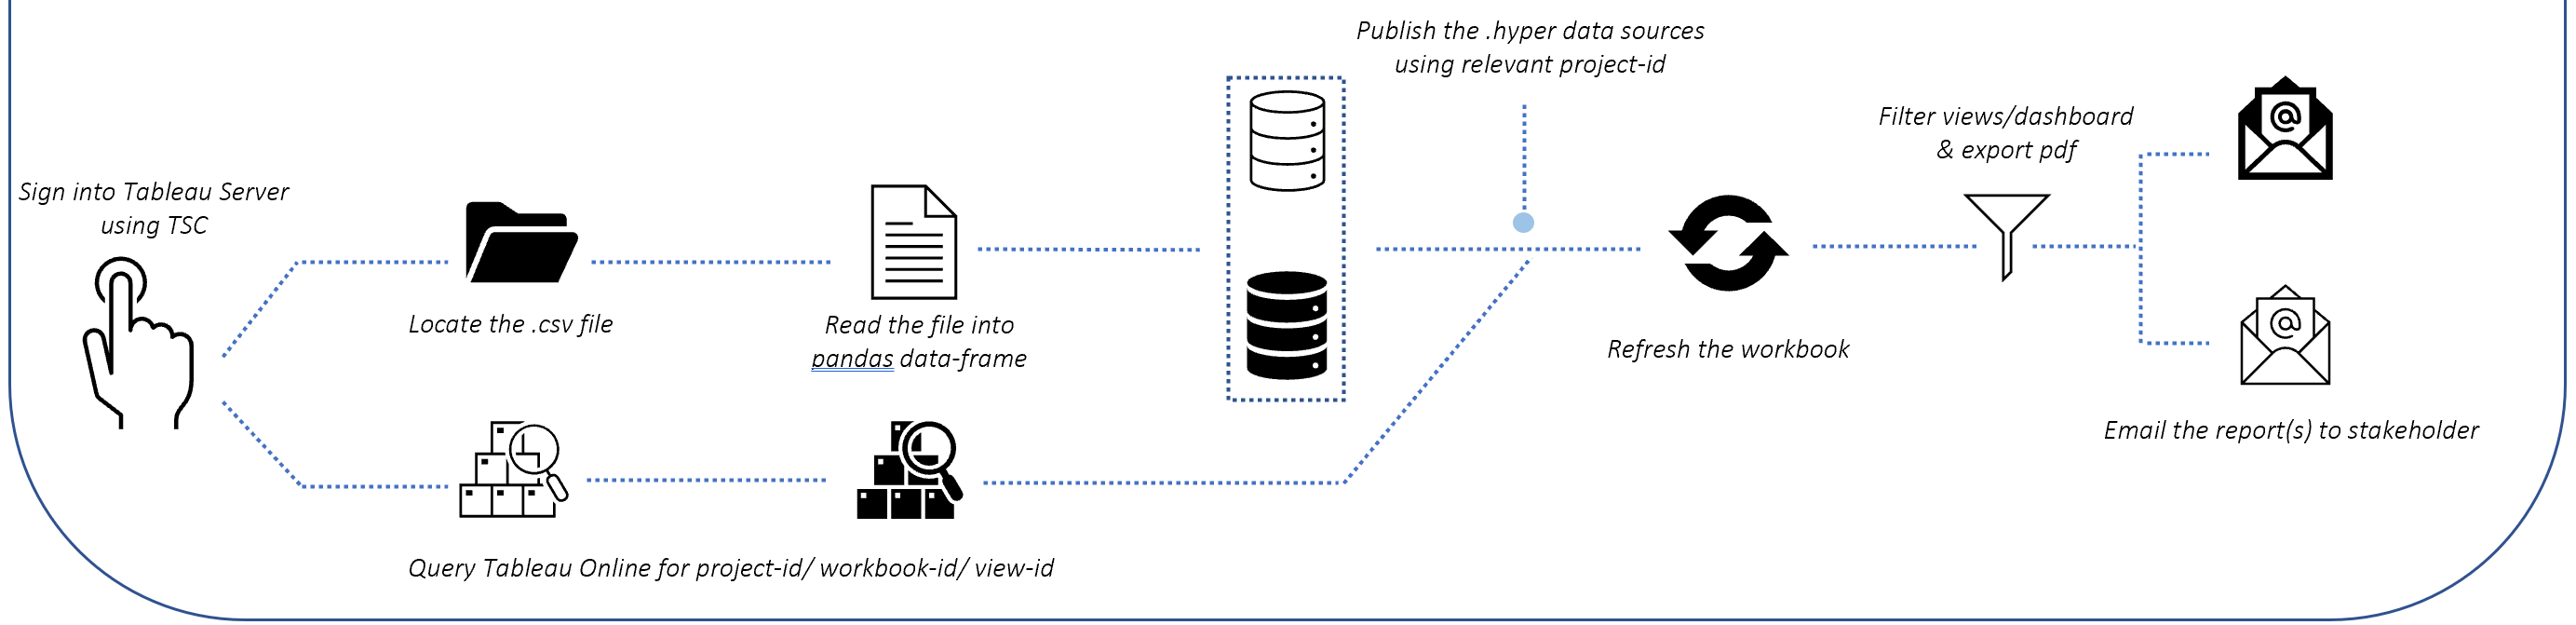

### Adding view filters and preparing views for download

In [45]:
option_factory = getattr(TSC, "PDFRequestOptions")
options = option_factory().vf("Region","West,North")
options.vf("New-Sales","Report")

#To get the list of all filter options use
print(options.view_filters)

[('Region', 'West,North'), ('New-Sales', 'Report')]


### Exporting as PDF

In [46]:
with server.auth.sign_in(tableau_auth):
    server.views.populate_pdf(view, options)
    with open('C:/Users/VirajDeshpande/Desktop/TUG - June 2020/dashboard 1.pdf', 'wb') as f:
        f.write(view.pdf)

### Repeating Prep and Export for a different set of filters

In [47]:
option_factory = getattr(TSC, "PDFRequestOptions")
options = option_factory().vf("Region","East,South")
options.vf("New-Sales","Report")

#To get the list of all filter options use
print(options.view_filters)

[('Region', 'East,South'), ('New-Sales', 'Report')]


In [48]:
with server.auth.sign_in(tableau_auth):
    server.views.populate_pdf(view, options)
    with open('C:/Users/VirajDeshpande/Desktop/TUG - June 2020/dashboard 2.pdf', 'wb') as f:
        f.write(view.pdf)

### Sending email to stakeholders

In [49]:
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 
   
fromaddr = "xxxxx"
toaddr = "xxxxx"
   
# instance of MIMEMultipart 
msg = MIMEMultipart() 
  
# storing the senders email address   
msg['From'] = fromaddr 
  
# storing the receivers email address  
msg['To'] = toaddr 
  
# storing the subject  
msg['Subject'] = "Sales-Report"
  
# string to store the body of the mail 
body = "Hi,\nPFA the Sales report for the West and North Zone. \n\nBest, \n\nDataVizardry."
  
# attach the body with the msg instance 
msg.attach(MIMEText(body, 'plain')) 
  
# open the file to be sent  
filename = "Sales-Report.pdf"
attachment = open("path/dashboard 1.pdf", "rb") 
  
# instance of MIMEBase and named as p 
p = MIMEBase('application', 'octet-stream') 
  
# To change the payload into encoded form 
p.set_payload((attachment).read()) 
  
# encode into base64 
encoders.encode_base64(p) 
   
p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
  
# attach the instance 'p' to instance 'msg' 
msg.attach(p) 
  
# creates SMTP session 
s = smtplib.SMTP('smtp.gmail.com', 587) 
  
# start TLS for security 
s.starttls() 
  
# Authentication 
s.login(fromaddr, password) 
  
# Converts the Multipart msg into a string 
text = msg.as_string() 
  
# sending the mail 
s.sendmail(fromaddr, toaddr, text) 

{}

In [50]:
toaddr = "xxxxx"
   
# instance of MIMEMultipart 
msg = MIMEMultipart() 
  
# storing the senders email address   
msg['From'] = fromaddr 
  
# storing the receivers email address  
msg['To'] = toaddr 
  
# storing the subject  
msg['Subject'] = "Sales-Report"
  
# string to store the body of the mail 
body = "Hi,\nPFA the Sales report for the East and South Zone. \n\nBest, \n\nDataVizardry."
  
# attach the body with the msg instance 
msg.attach(MIMEText(body, 'plain')) 
  
# open the file to be sent  
filename = "Sales-Report.pdf"
attachment = open("path/dashboard 2.pdf", "rb") 
  
# instance of MIMEBase and named as p 
p = MIMEBase('application', 'octet-stream') 
  
# To change the payload into encoded form 
p.set_payload((attachment).read()) 
  
# encode into base64 
encoders.encode_base64(p) 
   
p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
  
# attach the instance 'p' to instance 'msg' 
msg.attach(p) 
  
# Converts the Multipart msg into a string 
text = msg.as_string() 
  
# sending the mail 
s.sendmail(fromaddr, toaddr, text) 
  
# terminating the session 
s.quit() 

(221, b'2.0.0 closing connection 79sm2706942qkf.48 - gsmtp')

### Some more interesting functionalities

### Hyper API Demo
The API helps us define a Schema and Tables in addition to giving a SQL like querying capability

#### Why use .hyper? 

1. Performance

2. Reduced load

3. Portability

4. Pre-aggregations

5. Materialization of calculated fields

6. Publishing to Tableau Public and Tableau Online

Reference: https://www.tableau.com/about/blog/2014/7/why-use-tableau-data-extracts-32187

#### Workflow when using Hyper API

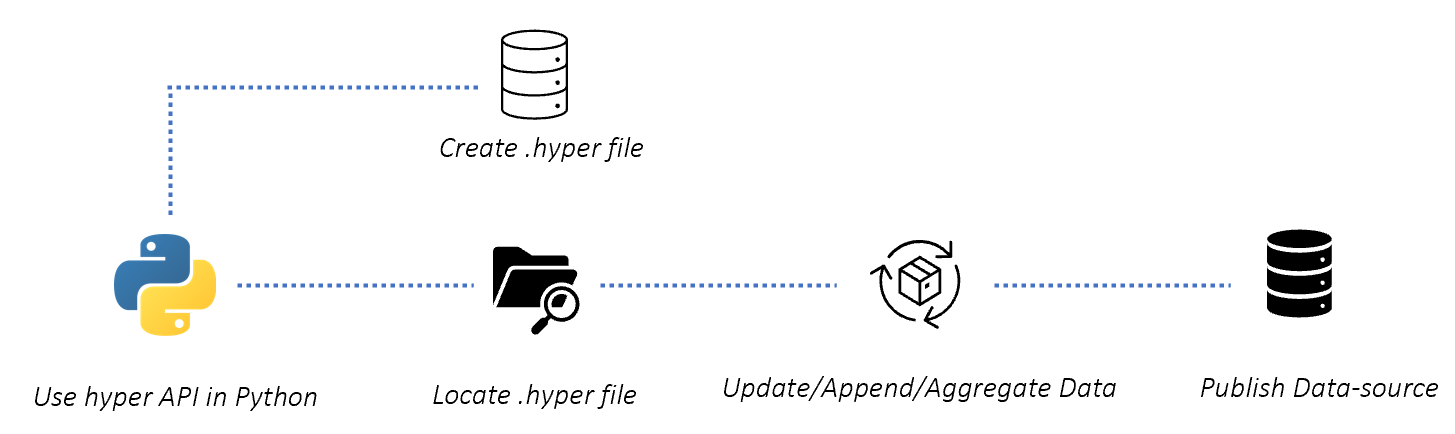

#### Workflow without Hyper API

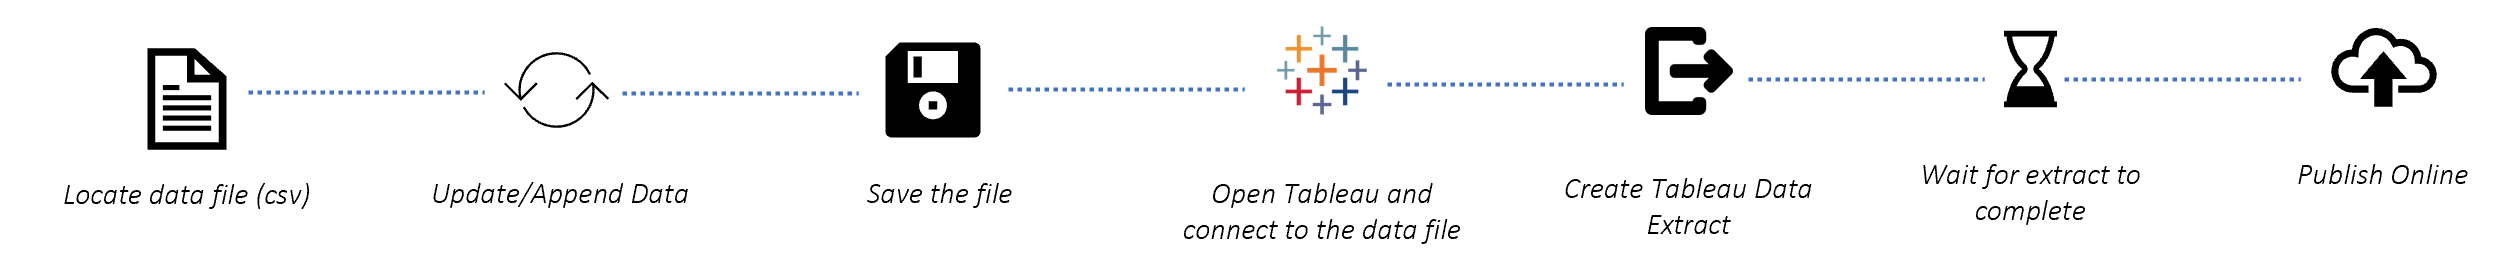

In [51]:
# Start a new private local Hyper instance
with HyperProcess(Telemetry.SEND_USAGE_DATA_TO_TABLEAU, 'myapp') as hyper:
    # Create the extract, replace it if it already exists
    with Connection(hyper.endpoint, 'C:/Users/VirajDeshpande/Desktop/TUG - June 2020/hyper_api_ex.hyper', CreateMode.CREATE_AND_REPLACE) as connection:
        schema = TableDefinition('foo', [
            TableDefinition.Column('Year', SqlType.int()),
            TableDefinition.Column('Region', SqlType.text()),
            TableDefinition.Column('Sales', SqlType.int()),
        ])
        connection.catalog.create_table(schema)
        with Inserter(connection, schema) as inserter:
            inserter.add_rows([
                [2001, 'North', 1134],
                [2002, 'North', 1334],
            ])
            inserter.execute()

Viewing the data inside the .hyper file as a dataframe, checking to see if the data insert went through without any errors

In [52]:
df_x = pantab.frame_from_hyper("C:/Users/VirajDeshpande/Desktop/TUG - June 2020/hyper_api_ex.hyper", table="foo")
print(df_x)

   Year Region  Sales
0  2001  North   1134
1  2002  North   1334


Appending data to the dataframe

In [53]:
with HyperProcess(Telemetry.SEND_USAGE_DATA_TO_TABLEAU, 'myapp') as hyper:
    with Connection(hyper.endpoint, 'C:/Users/VirajDeshpande/Desktop/TUG - June 2020/hyper_api_ex.hyper') as connection:
            with Inserter(connection, 'foo') as inserter:
                inserter.add_row([2003, 'West', 1331])
                inserter.execute()

In [54]:
df_x = pantab.frame_from_hyper("C:/Users/VirajDeshpande/Desktop/TUG - June 2020/hyper_api_ex.hyper", table="foo")
print(df_x)

   Year Region  Sales
0  2001  North   1134
1  2002  North   1334
2  2003   West   1331


Querying the dataframe in a SQL like language - particularly useful when handling a large dataframe. The code below is also updating the values for a given entry based on some conditions.

Here, the sales for West Region were under-reported, thus we update the sales values to reflect the correct values

In [55]:
with HyperProcess(telemetry=Telemetry.SEND_USAGE_DATA_TO_TABLEAU ) as hyper:

#  Connect to an existing .hyper file (CreateMode.NONE)
    with Connection(endpoint=hyper.endpoint, database='C:/Users/VirajDeshpande/Desktop/TUG - June 2020/hyper_api_ex.hyper') as connection:
        row_count = connection.execute_command(
        command=f"UPDATE {escape_name('foo')} "
        f"SET {escape_name('Sales')} = {escape_name('Sales')}*1.5 "
        f"WHERE {escape_name('Region')} = {escape_string_literal('West')}")

In [56]:
df_x = pantab.frame_from_hyper("C:/Users/VirajDeshpande/Desktop/TUG - June 2020/hyper_api_ex.hyper", table="foo")
print(df_x)

   Year Region  Sales
0  2001  North   1134
1  2002  North   1334
2  2003   West   1997




Now that our dataframe is ready, we can publish it to Tableau Online using the steps we followed earlier in the Demo



In [57]:
with server.auth.sign_in(tableau_auth):
    mydatasourceitem = TSC.DatasourceItem(project_id[0],
                                          name='Hyper-Data-Sample')
    item = server.datasources.publish(mydatasourceitem,
                                      'C:/Users/VirajDeshpande/Desktop/TUG - June 2020/hyper_api_ex.hyper', 'Overwrite')
    print("{} published with id: {}".format(item.name, item.id))

Hyper-Data-Sample published with id: 5140335e-4d93-4a6b-9c42-6f34ced67b91
